# Transfer novoSpaRc mapping results back to the atlas

#### Working directory should contain root atlas Seurat object, which is available on GEO under record GSE152766:

    Root_Atlas.rds (or get it by running through notebook 2)
    
#### Working directory must contain subdirectories,supp_data

#### supp_data/ should contain the file:

    SCT_dge_50k.txt (get it by using the same method as in notebook 4-1)
    cell_to_local_index_50k_49markers.txt (get it by running through notebook 3-1)
    geometry_arabidopsis_root_binarized.txt
    color_scheme_at.RData


In [1]:
rm(list=ls())
setwd("/scratch/AG_Ohler/CheWei/scKB")

In [3]:
suppressMessages(library(Seurat))
suppressMessages(library(tidyverse))
suppressMessages(library(dplyr))
suppressMessages(library(RColorBrewer))
suppressMessages(library(cowplot))
suppressMessages(library(grid))
suppressMessages(library(gplots))

In [4]:
# Load atlas
rc.integrated <- readRDS('./Root_Atlas.rds')

In [5]:
# Load subsets of atlas
SCT_dge_50k <- read.table("./supp_data/SCT_dge_50k.txt", sep="\t")

In [6]:
# Load novoSpaRc results
idx_50k <- as.numeric(read.table("./supp_data/cell_to_local_index_50k_49markers.txt", sep="\t")$V1)

In [7]:
# Load meta data ( geometry, annotations ...etc )
root_geom_meta <- read.table("./supp_data/geometry_arabidopsis_root_binarized.txt", sep="\t", header=TRUE)

In [8]:
# Load the color scheme for time and cell type annotation
load("./supp_data/color_scheme_at.RData")

In [9]:
# Transfer novoSpaRc results to the atlas
temp <- rep("Unknown", ncol(rc.integrated))
temp[match(colnames(SCT_dge_50k), colnames(rc.integrated))]=root_geom_meta$annotation[idx_50k]
rc.integrated$novo.anno <- temp
temp <- rep("Unknown", ncol(rc.integrated))
temp[match(colnames(SCT_dge_50k), colnames(rc.integrated))]=root_geom_meta$ncfqc[idx_50k]
rc.integrated$ncfqc <- temp
temp <- rep("Unknown", ncol(rc.integrated))
temp[match(colnames(SCT_dge_50k), colnames(rc.integrated))]=root_geom_meta$annotation_ncfqc[idx_50k]
rc.integrated$annotation_ncfqc <- temp
temp <- rep("Unknown", ncol(rc.integrated))
temp[match(colnames(SCT_dge_50k), colnames(rc.integrated))]=root_geom_meta$zone[idx_50k]
rc.integrated$zone <- temp

In [10]:
extract.integrated <- subset(rc.integrated, cells=colnames(SCT_dge_50k))
table(extract.integrated$novo.anno)


    Atrichoblast        Columella           Cortex       Endodermis 
            6880             1101             3617             4776 
Lateral Root Cap        Pericycle           Phloem       Procambium 
            8574             4745             7043             6184 
Quiescent Center      Trichoblast            Xylem 
             240             4032             2808 

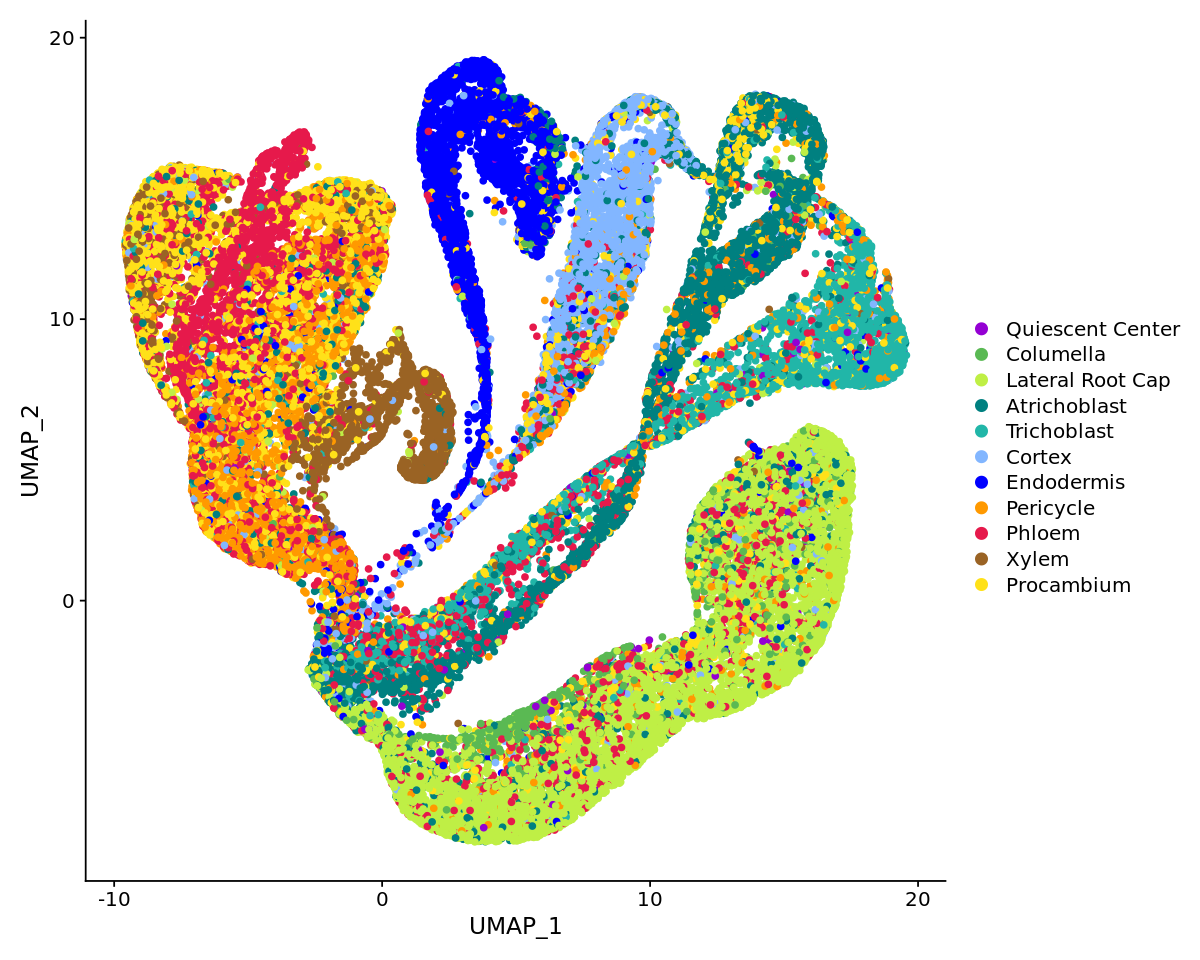

In [11]:
# novoSpaRc mapping on cell types
order <- c("Quiescent Center", "Stem Cell Niche", "Columella", "Lateral Root Cap", "Atrichoblast", "Trichoblast", "Cortex", "Endodermis", "Pericycle", "Phloem", "Xylem", "Procambium", "NA")
palette <- c("#9400d3", "#DCD0FF", "#5AB953", "#BFEF45", "#008080", "#21B6A8", "#82B6FF", "#0000FF","#FF9900","#E6194B", "#9A6324", "#FFE119","#FFFFFF")
extract.integrated$novo.anno <- factor(extract.integrated$novo.anno, levels = order[sort(match(unique(extract.integrated$novo.anno),order))])
color <- palette[sort(match(unique(extract.integrated$novo.anno),order))]
options(repr.plot.width=10, repr.plot.height=8)
DimPlot(extract.integrated, reduction = "umap", group.by = "novo.anno", cols=color, pt.size=1.5)

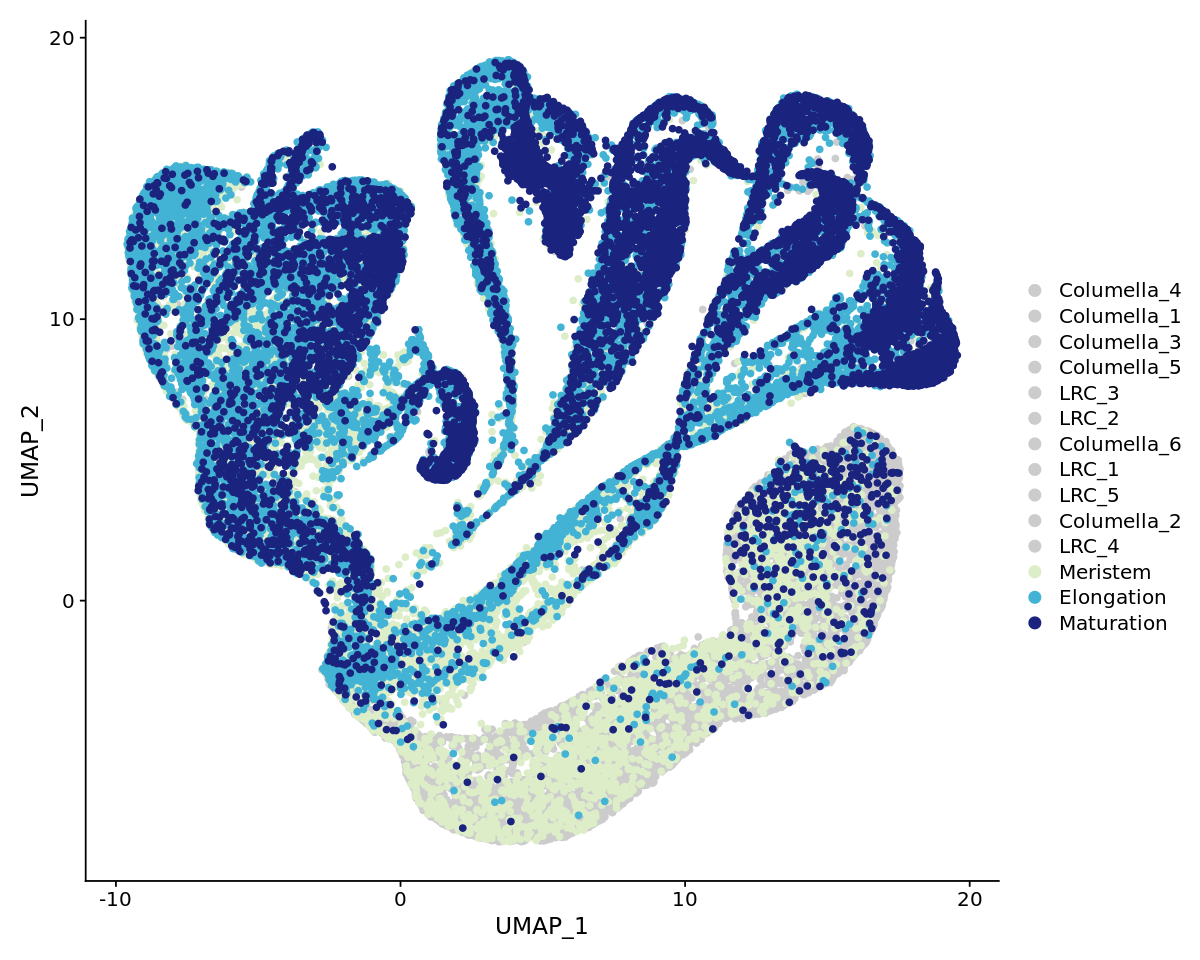

In [15]:
# Time zone
DimPlot(extract.integrated, group.by = "zone", order = c("Maturation","Elongation","Meristem"),cols = c(rep("#cccccc", 11), "#DCEDC8", "#42B3D5", "#1A237E"), pt.size=1.5)

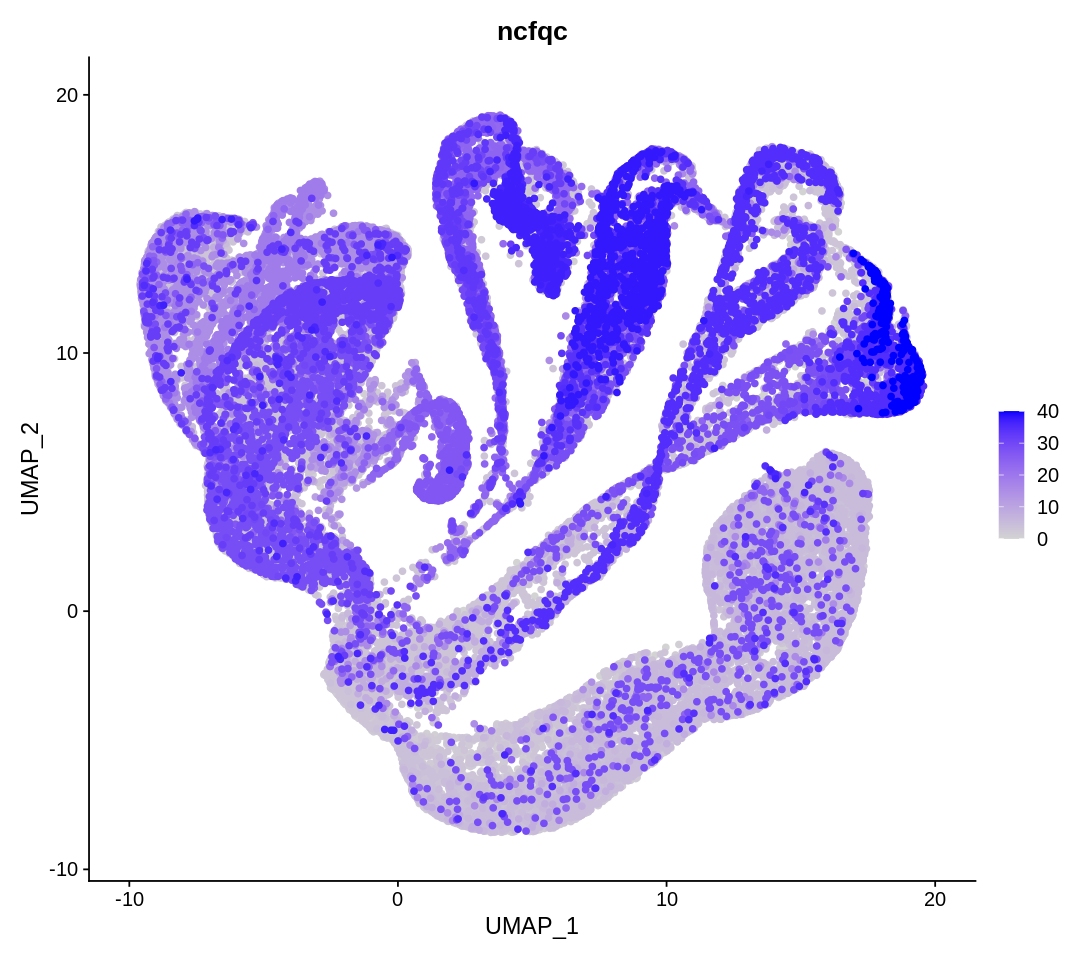

In [16]:
# Number of cells from QC
extract.integrated$ncfqc <- as.numeric(extract.integrated$ncfqc)
options(repr.plot.width=9, repr.plot.height=8)
FeaturePlot(extract.integrated, reduction = "umap", feature = "ncfqc", order=TRUE, pt.size=1.5)

## novoSpaRc mapping for Columella

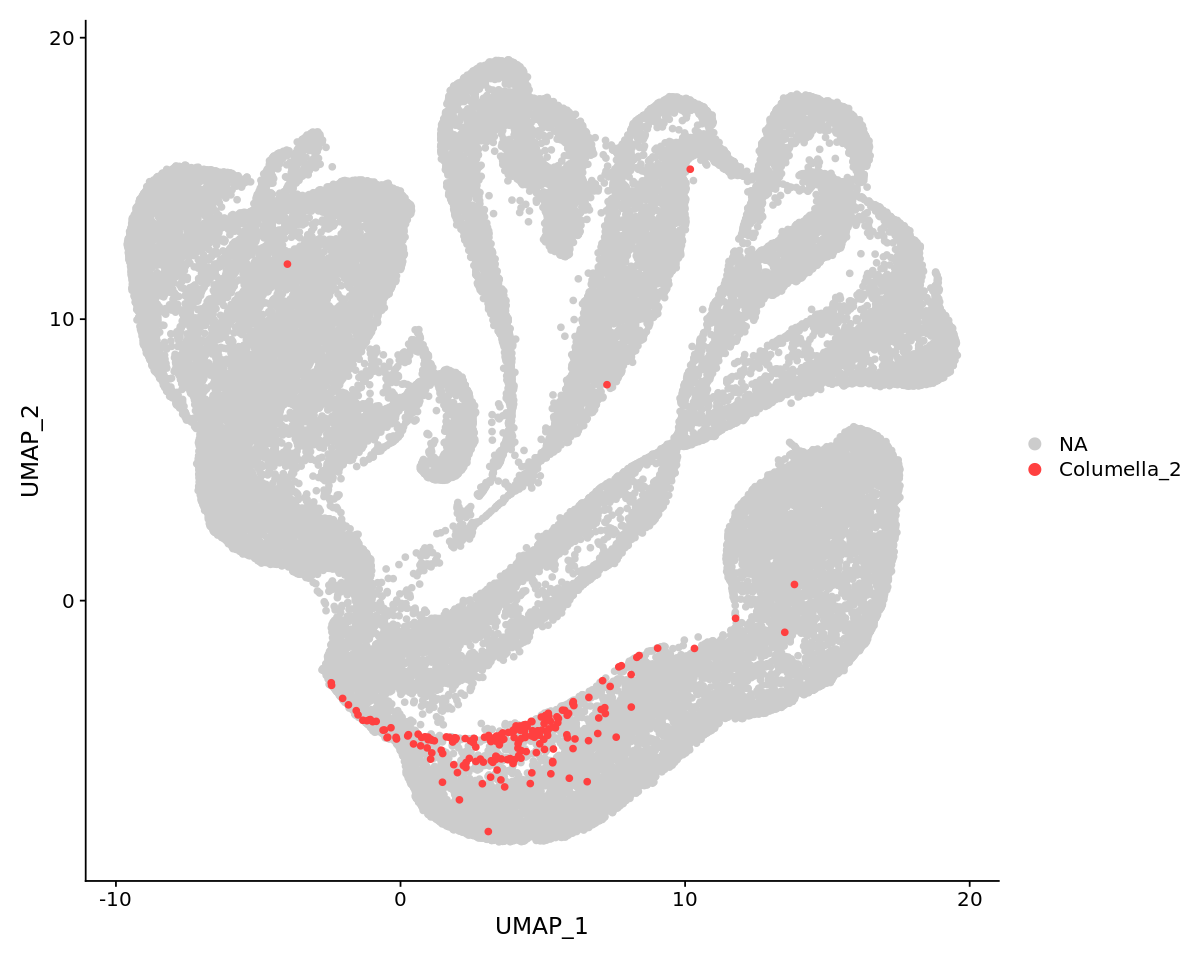

In [17]:
temp <- rep("NA", ncol(extract.integrated))
temp[which(extract.integrated$annotation_ncfqc=="Columella_2")]="Columella_2"
extract.integrated$temp <- temp
options(repr.plot.width=10, repr.plot.height=8)
DimPlot(extract.integrated, reduction = "umap", group.by = "temp", order = c("Columella_2","NA"),cols=c("#cccccc", "#ff4040"), pt.size=1.5)

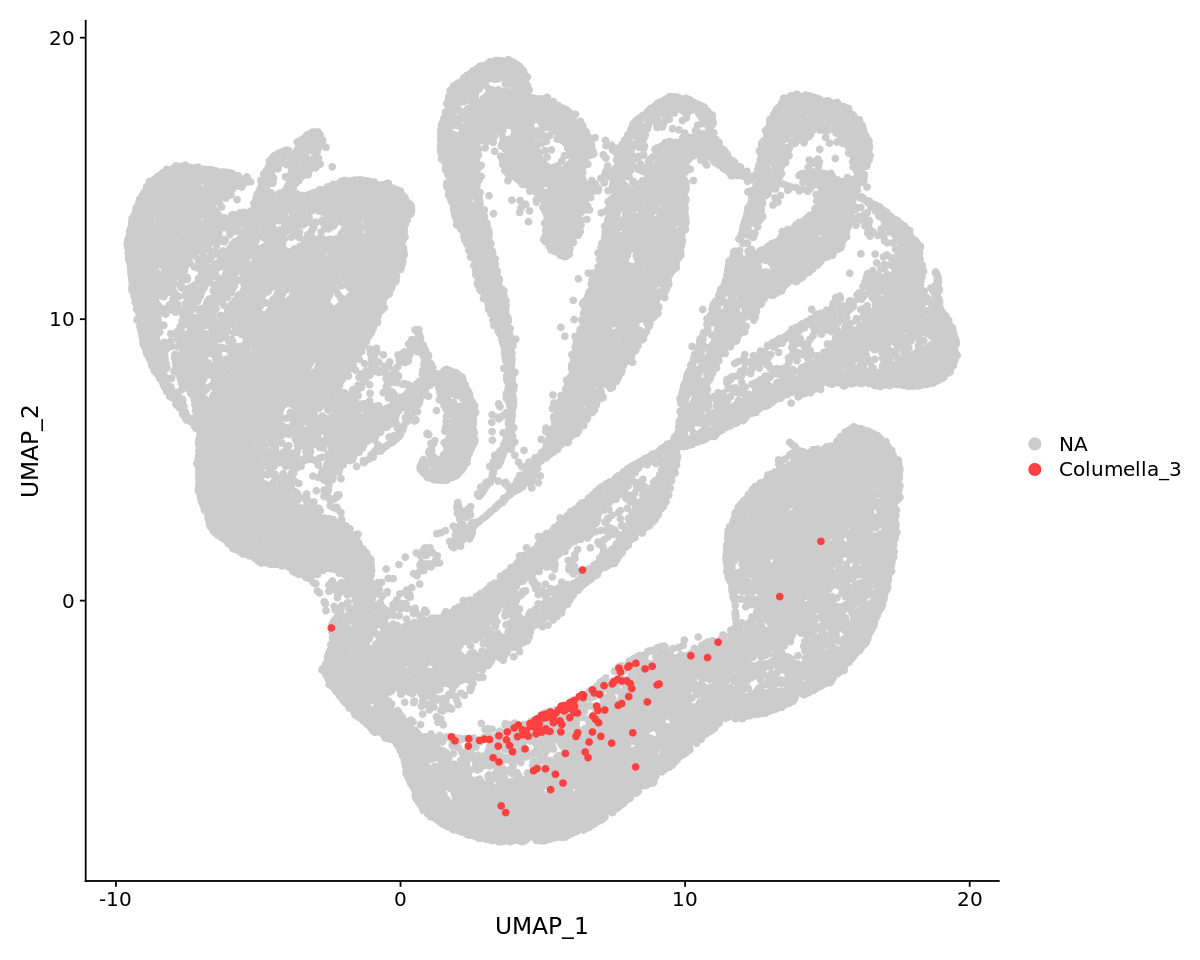

In [18]:
temp <- rep("NA", ncol(extract.integrated))
temp[which(extract.integrated$annotation_ncfqc=="Columella_3")]="Columella_3"
extract.integrated$temp <- temp
options(repr.plot.width=10, repr.plot.height=8)
DimPlot(extract.integrated, reduction = "umap", group.by = "temp", order = c("Columella_3","NA"),cols=c("#cccccc", "#ff4040"), pt.size=1.5)

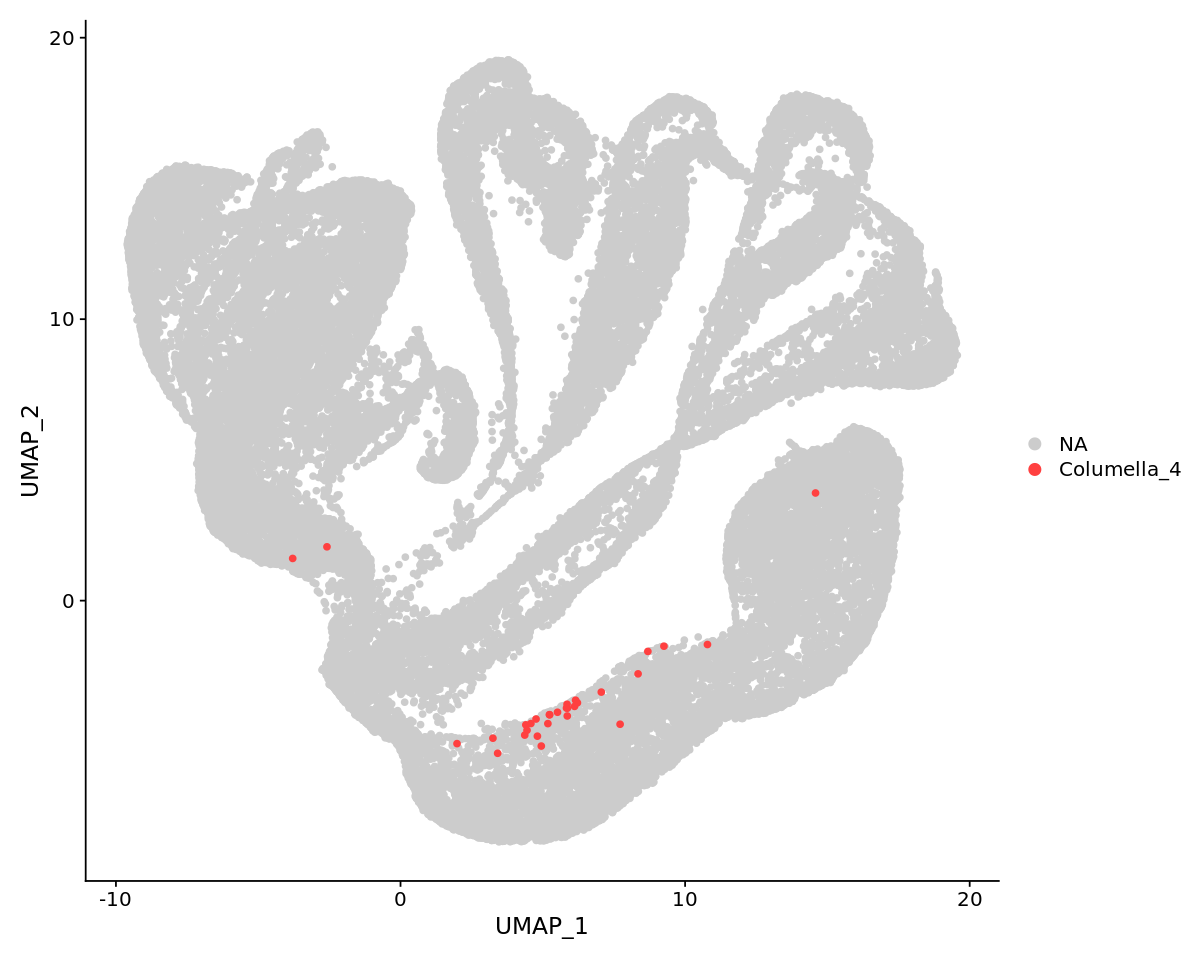

In [19]:
temp <- rep("NA", ncol(extract.integrated))
temp[which(extract.integrated$annotation_ncfqc=="Columella_4")]="Columella_4"
extract.integrated$temp <- temp
options(repr.plot.width=10, repr.plot.height=8)
DimPlot(extract.integrated, reduction = "umap", group.by = "temp", order = c("Columella_4","NA"),cols=c("#cccccc", "#ff4040"), pt.size=1.5)

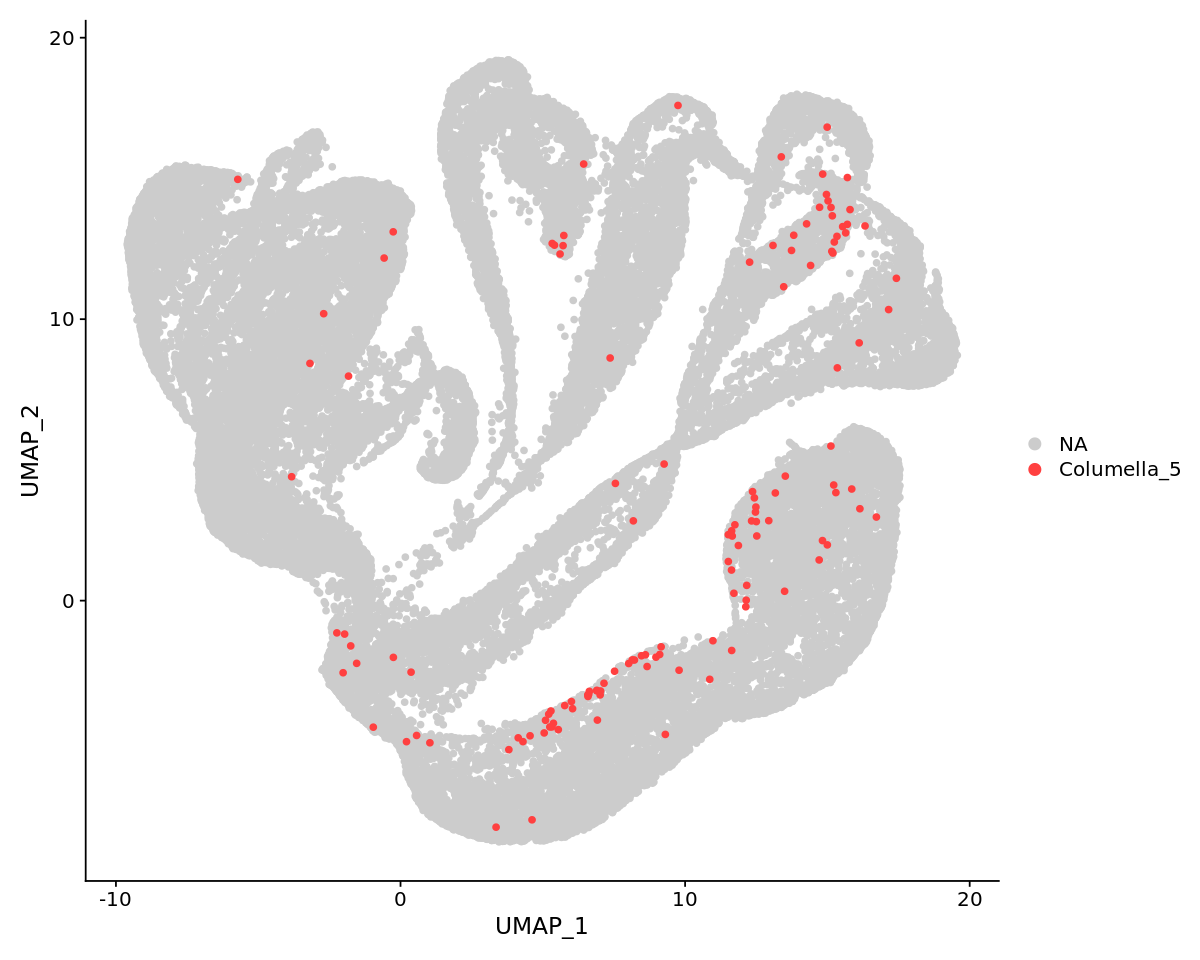

In [20]:
temp <- rep("NA", ncol(extract.integrated))
temp[which(extract.integrated$annotation_ncfqc=="Columella_5")]="Columella_5"
extract.integrated$temp <- temp
options(repr.plot.width=10, repr.plot.height=8)
DimPlot(extract.integrated, reduction = "umap", group.by = "temp", order = c("Columella_5","NA"),cols=c("#cccccc", "#ff4040"), pt.size=1.5)

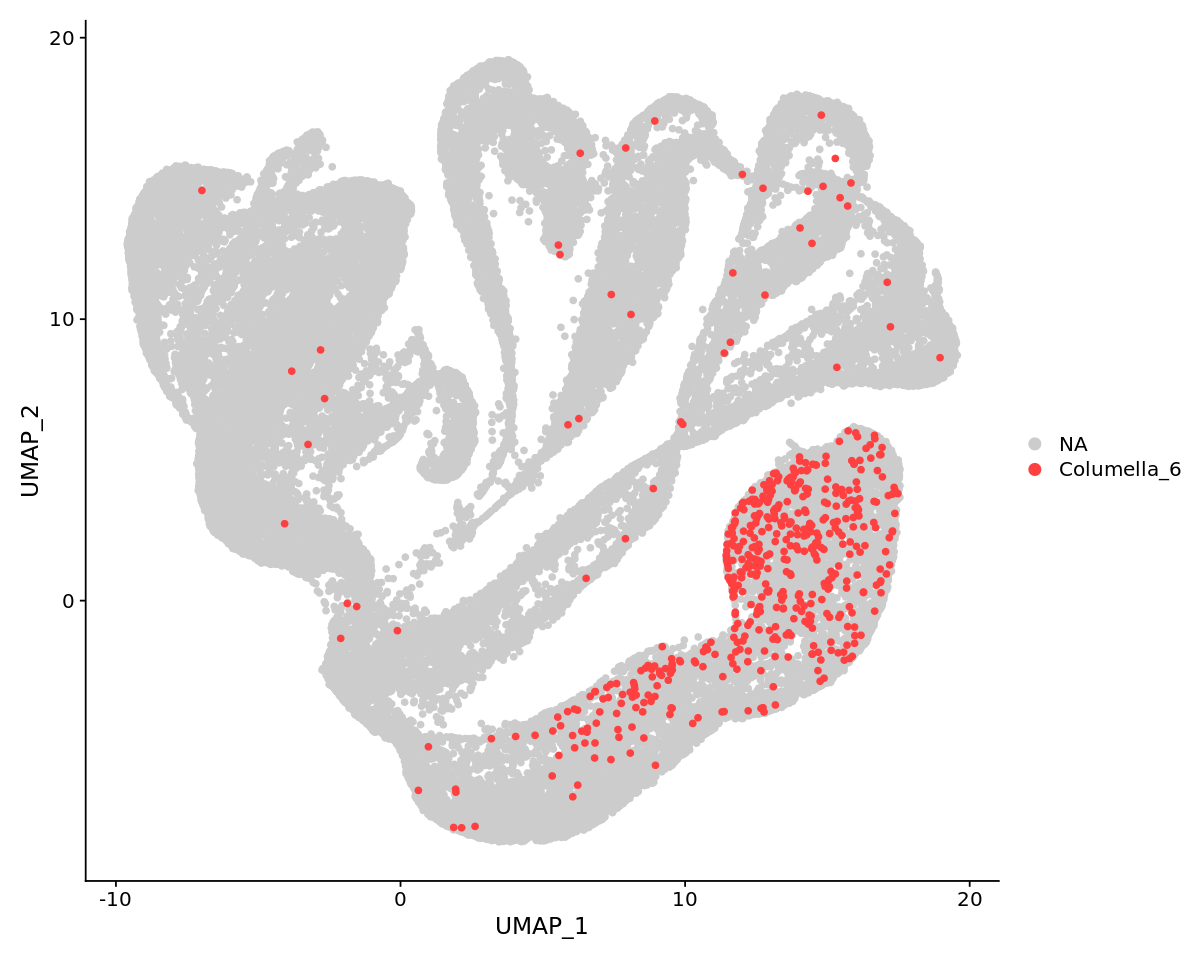

In [21]:
temp <- rep("NA", ncol(extract.integrated))
temp[which(extract.integrated$annotation_ncfqc=="Columella_6")]="Columella_6"
extract.integrated$temp <- temp
options(repr.plot.width=10, repr.plot.height=8)
DimPlot(extract.integrated, reduction = "umap", group.by = "temp", order = c("Columella_6","NA"),cols=c("#cccccc", "#ff4040"), pt.size=1.5)

## novoSpaRc mapping for Lateral Root Cap

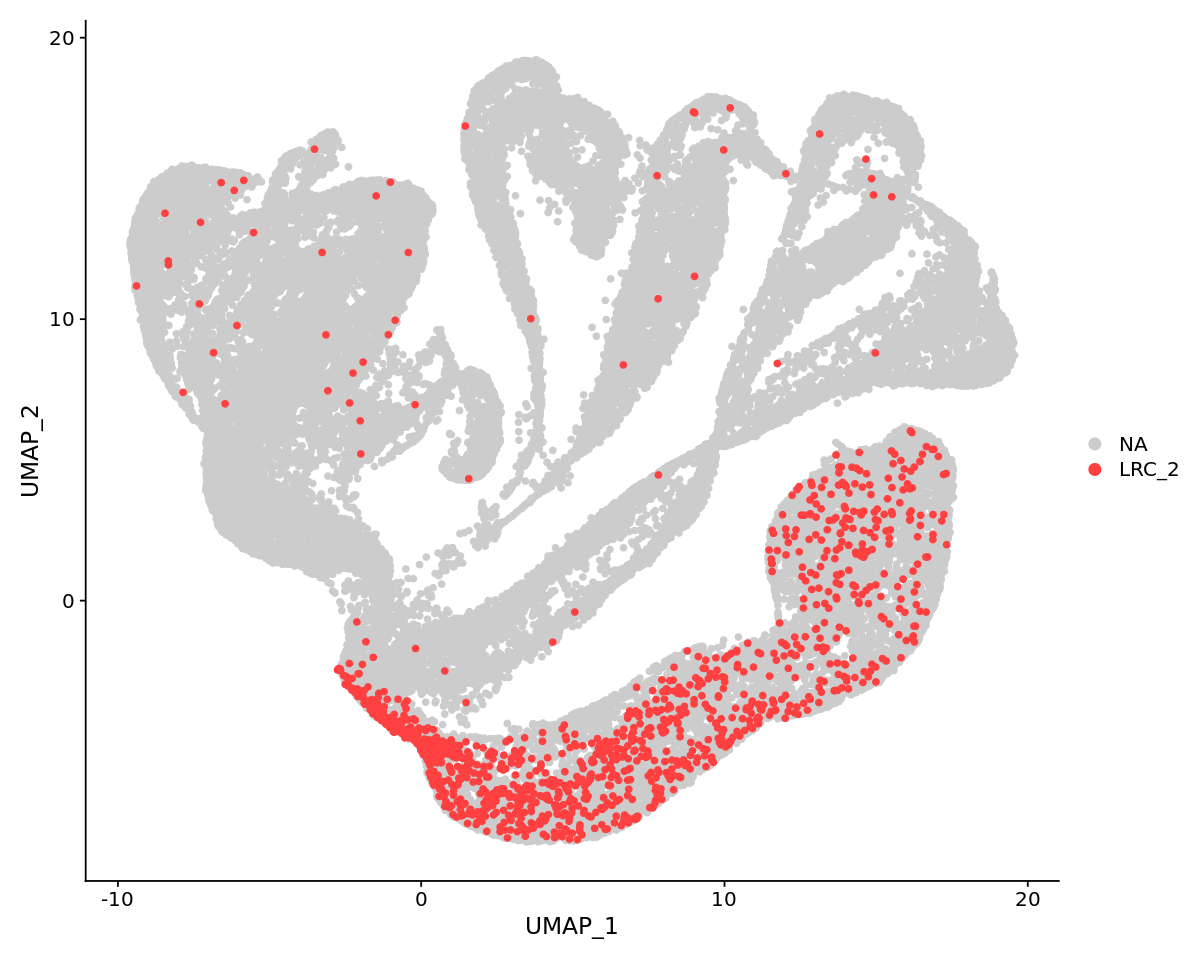

In [23]:
temp <- rep("NA", ncol(extract.integrated))
temp[which(extract.integrated$annotation_ncfqc=="LRC_2")]="LRC_2"
extract.integrated$temp <- temp
options(repr.plot.width=10, repr.plot.height=8)
DimPlot(extract.integrated, reduction = "umap", group.by = "temp", order = c("LRC_2","NA"),cols=c("#cccccc", "#ff4040"), pt.size=1.5)

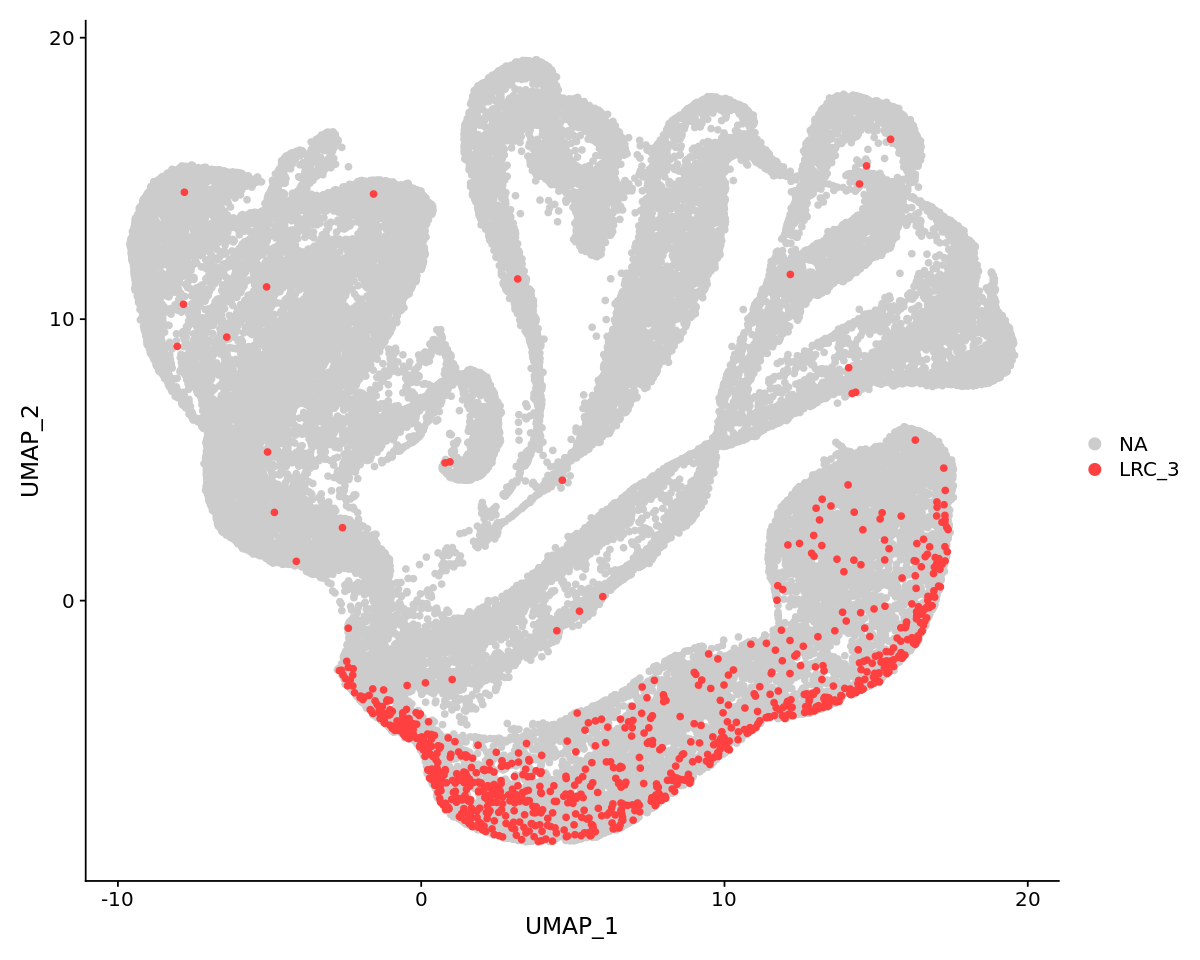

In [24]:
temp <- rep("NA", ncol(extract.integrated))
temp[which(extract.integrated$annotation_ncfqc=="LRC_3")]="LRC_3"
extract.integrated$temp <- temp
options(repr.plot.width=10, repr.plot.height=8)
DimPlot(extract.integrated, reduction = "umap", group.by = "temp", order = c("LRC_3","NA"),cols=c("#cccccc", "#ff4040"), pt.size=1.5)

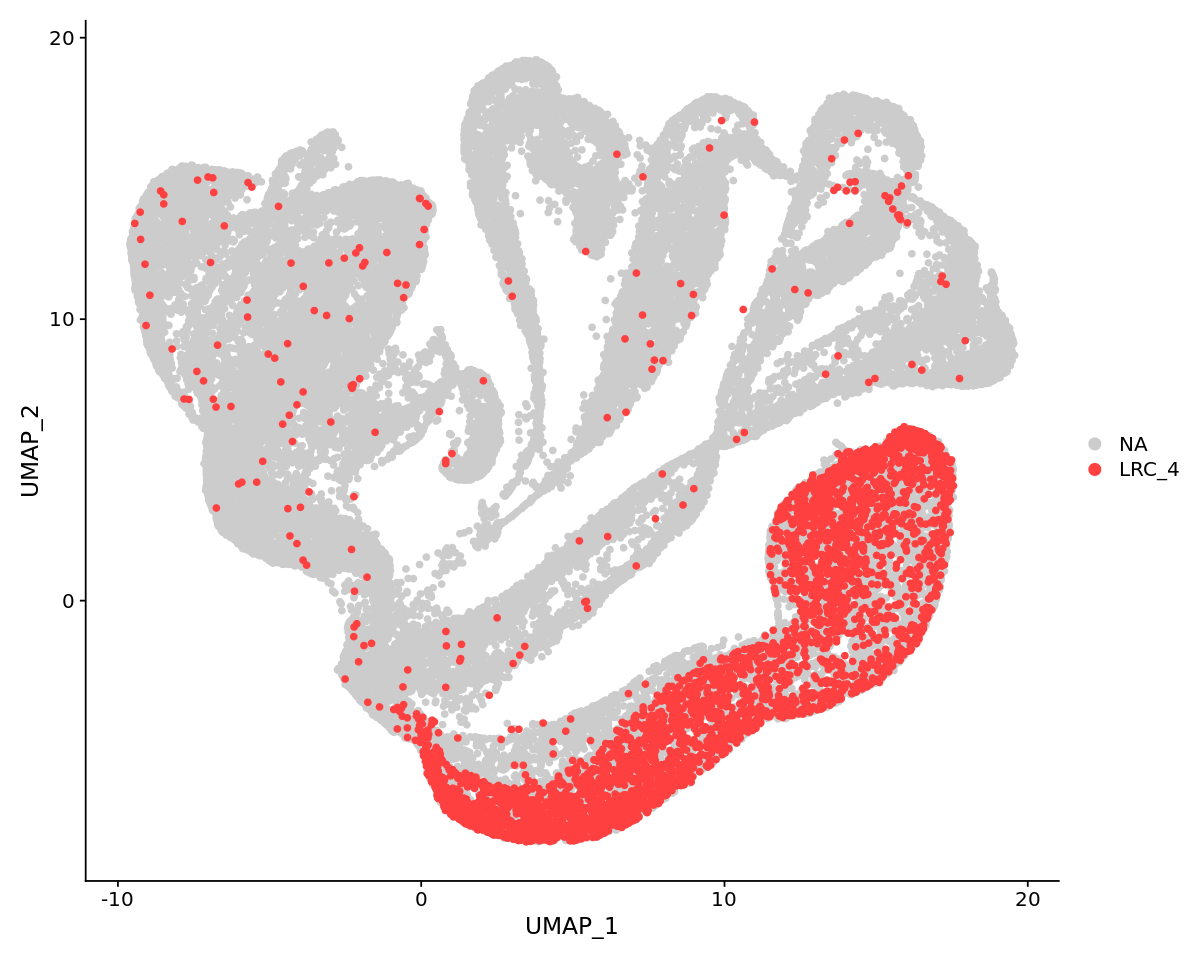

In [25]:
temp <- rep("NA", ncol(extract.integrated))
temp[which(extract.integrated$annotation_ncfqc=="LRC_4")]="LRC_4"
extract.integrated$temp <- temp
options(repr.plot.width=10, repr.plot.height=8)
DimPlot(extract.integrated, reduction = "umap", group.by = "temp", order = c("LRC_4","NA"),cols=c("#cccccc", "#ff4040"), pt.size=1.5)

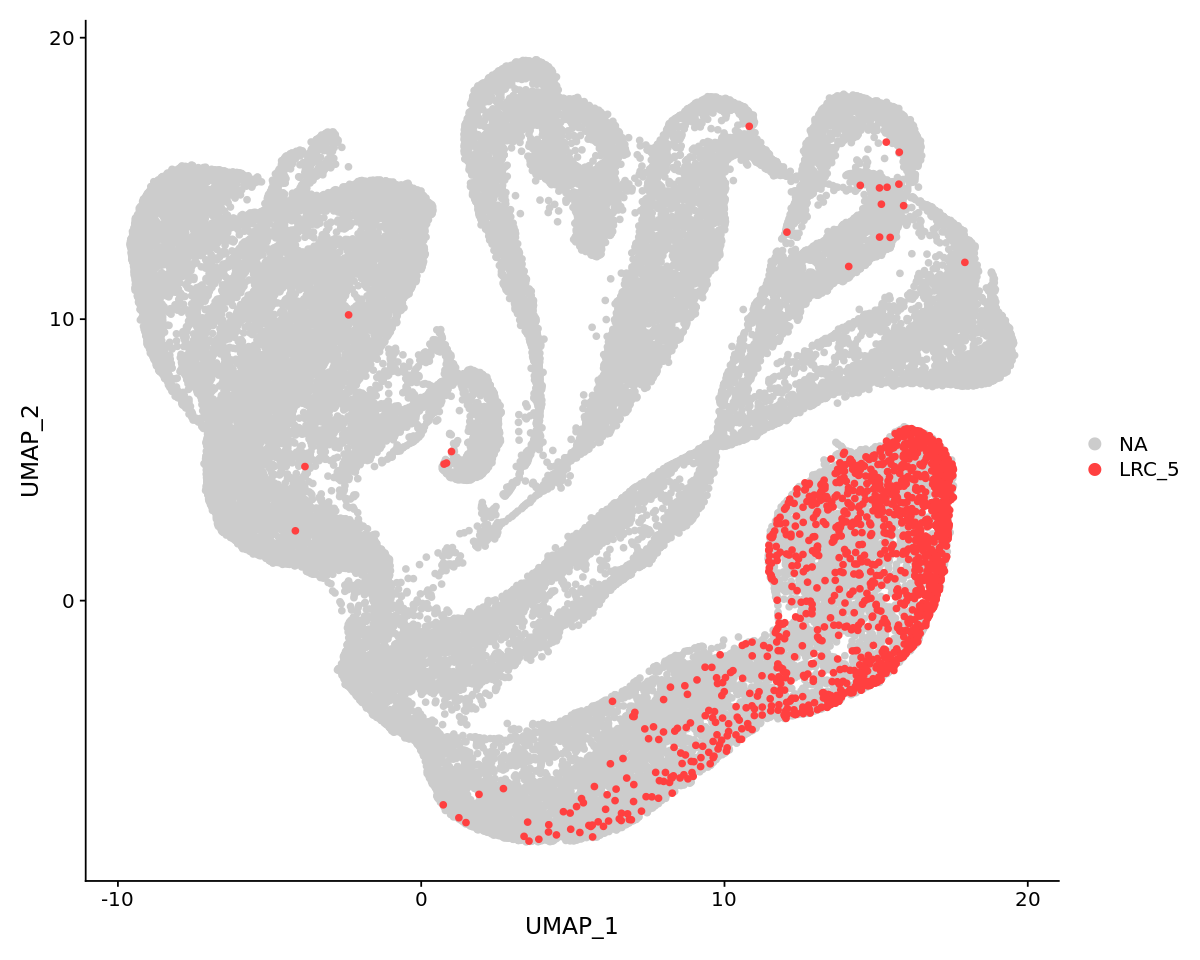

In [26]:
temp <- rep("NA", ncol(extract.integrated))
temp[which(extract.integrated$annotation_ncfqc=="LRC_5")]="LRC_5"
extract.integrated$temp <- temp
options(repr.plot.width=10, repr.plot.height=8)
DimPlot(extract.integrated, reduction = "umap", group.by = "temp", order = c("LRC_5","NA"),cols=c("#cccccc", "#ff4040"), pt.size=1.5)

## Output

In [17]:
write.table(rc.integrated@meta.data[,c('novo.anno','ncfqc','annotation_ncfqc','zone')], file="./supp_data/spatial_anno.txt", sep="\t", quote=FALSE, row.names = TRUE, col.names = TRUE)